
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **What is the purpouse of this notebook ?**:<br>
Here in this notebook it will answer:<br>
<ol type="1">
    <li>Which actors appear in the most movies?</li>
    <li>Which movies had the highest budget?</li>

</ol>


In [1]:
#importing all nescerary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv('tmdb-movies.csv')
def df_viewer():
    #get the amount of null data in the dataset
    print(f"The Number of missing values is:  {movies.isnull().sum().sum()}")

    #get the amount of unique values in the dataset
    print(f"The Number of duplicated values is:  {movies.duplicated().sum()}")

    #check the data
    movies.info()

<ul>
    <li>imported the librarys needed for the project</li>
    <li>created functions that will help making the code cleaner and avoid repetions</li>
</ul>

<a id='wrangling'></a>
## Data Wrangling



In [2]:
#to wrangle data

df_viewer()


The Number of missing values is:  13434
The Number of duplicated values is:  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  obje

<ol type="1">
    <li>Got the total of <b>null data</b></li>
    <li>Got the <b>number of duplicated values</b> (which is 1)</li>
    <li>Got <b>information about every data coulmen</b> in the dataset</li>
</ol>


### Data Cleaning (Removing Null values and duplicates)

In [3]:
#droping the null values
movies = movies.dropna()

#droping the duplicated values
movies = movies.drop_duplicates()

#making sure that the data is clean
print(f"The Number of missing values is:  {movies.isnull().sum().sum()}")
print(f"The Number of duplicated values is:  {movies.duplicated().sum()}")
movies.info()


The Number of missing values is:  0
The Number of duplicated values is:  0
<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  p

<ol type="1">
    <li>Here we <b>cleaned the data</b> from <b>null values and duplicates</b></li>
    <li>Made sure that the <b>data is clean</b></li>
</ol>

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which actors appear in the most movies?

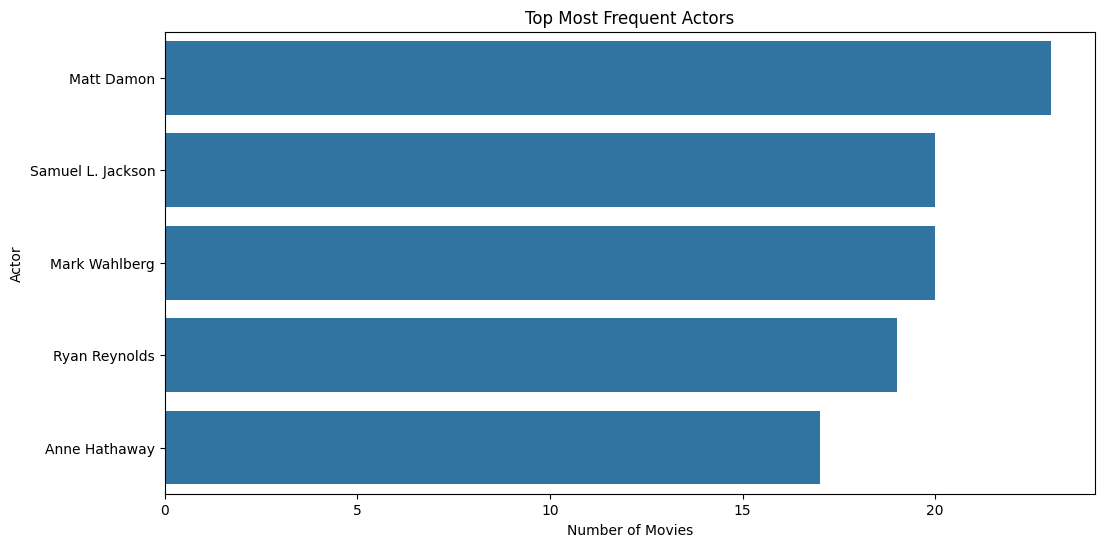

In [14]:

# Split and flatten the 'cast' column
all_actors = movies['cast'].str.split('|').explode()

# Count occurrences of each actor
actor_counts = all_actors.value_counts()

# Select the top 10 most frequent actors
top_actors = actor_counts.head()


plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("Top Most Frequent Actors")
plt.show()

Using Matplotlib and SeaBorn to make this bar chart to get the top most frequent actors

**The Answer to the question "Which actors appear in the most movies?" is :**<br><br>
-Matt Damon

### Research Question 2: Which movies had the highest budget?

In [15]:
movies['budget'].describe()

count    1.992000e+03
mean     3.454924e+07
std      5.061878e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+07
75%      4.800000e+07
max      4.250000e+08
Name: budget, dtype: float64

This provides key statistics about movie budgets, including the average, minimum, and maximum values.

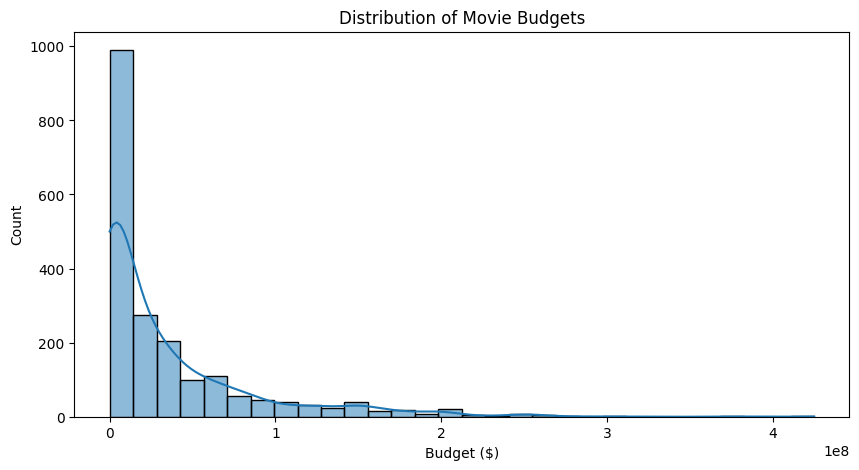

In [16]:

plt.figure(figsize=(10,5))
sns.histplot(movies['budget'], bins=30, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget ($)')
plt.show()

This histogram shows the distribution of movie budgets. Most movies have lower budgets, while only a few have extremely high budgets

In [17]:
movies['genres'].value_counts().head(10)

genres
Drama                   127
Comedy                  105
Drama|Romance            52
Documentary              51
Horror|Thriller          50
Comedy|Drama             46
Comedy|Romance           45
Comedy|Drama|Romance     42
Horror                   30
Drama|Thriller           28
Name: count, dtype: int64

This table shows the top 10 most common movie genres in the dataset

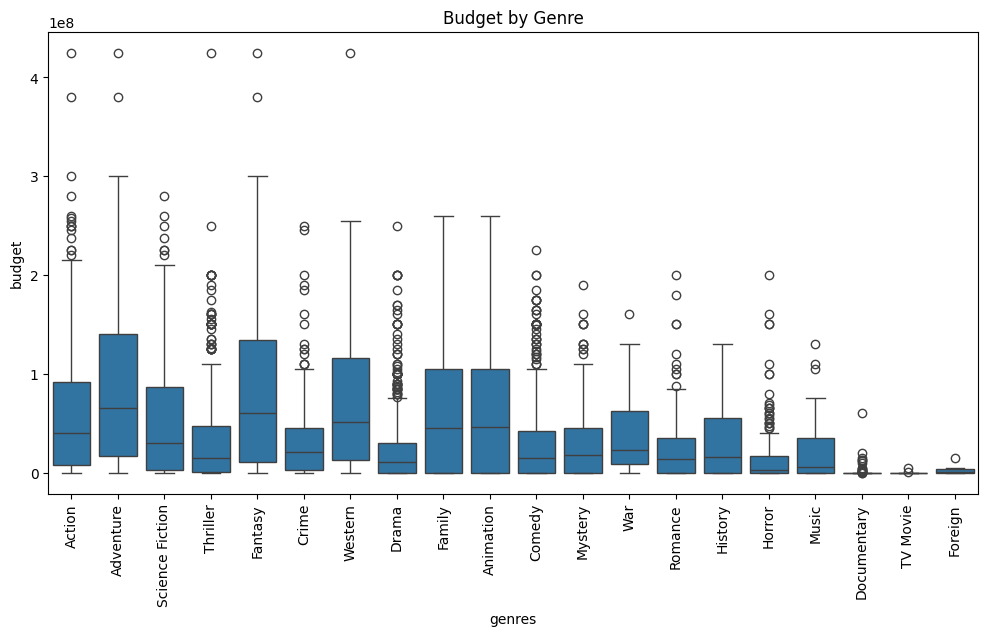

In [18]:
# Split genres and explode them into separate rows
movies_exploded = movies.assign(genres=movies['genres'].str.split('|')).explode('genres')

# Box plot for Budget by Genre
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x=movies_exploded['genres'], y=movies_exploded['budget'])
plt.xticks(rotation=90)
plt.title('Budget by Genre')
plt.show()


### Budget by Genre

- **High-Budget Genres:** Action, Adventure, and Sci-Fi movies tend to have higher budgets, likely due to expensive visual effects and large-scale productions.  
- **Low-Budget Genres:** Documentaries, Horror, and Dramas generally have lower budgets, focusing more on storytelling than visual effects.  
- **Outliers:** Some genres, like Sci-Fi and Action, have extreme outliers, representing blockbuster movies with exceptionally high budgets.

This analysis shows that different genres require varying levels of investment, with action-packed and visually heavy movies demanding the most funding.


<a id='conclusions'></a>

### Conclusion:
- The actor who **acted in most movies** was **Matt Damon**.
- The movie with the **highest budget** is **The Warrior's Way**.

### Limitations:
- **Missing or Incomplete Data:** Some movies may have missing budget or actor information, which could affect the accuracy of our results.
- **Multiple Actors:** The dataset does not consider supporting roles or uncredited appearances, which might impact the "most acted actor" result.
- **Budget Accuracy:** Some movies might have incorrect or estimated budget values, leading to possible errors in identifying the highest-budget film.
- **Genre Categorization:** Some movies belong to multiple genres, making it hard to analyze budgets by a single category.
